# Animating a simple wave

We'll plot at various times a wave $u(x,t)$ that starts as a triangular shape as in Taylor Example 16.1, and then animate it.  We can imagine this as simulating a wave on a taut string.  Here $u$ is the transverse displacement (i.e., $y$ in our two-dimensional plots).  We are not solving the wave equation as a differential equation here, but starting with $u(x,0) \equiv u_0(x)$ and plotting the solution at time $t$:

$\begin{align}
  u(x,t) = \frac12 u_0(x - ct) + \frac12 u_0(x + ct)
  \;,
\end{align}$

which *is* the solution to the wave equation starting with $u_0(x)$ at time $t=0$.

We have various choices for animation in a Jupyter notebook.  We will consider two possibilities, which both use `FuncAnimation` from `matplotlib.animation`.
1. Make a javascript movie that is then displayed inline with a movie-playing widget using `HTML`.  We use
`%matplotlib inline` for this option and use `%%capture` to prevent the figure from displaying prematurely.
2. Update the figure in real time (so to speak) by using `%matplotlib notebook`, which creates active figures that we can modify after they are displayed.

We'll do the first option here. We should define at least one class for the animation.

v1: Created 25-Mar-2019. Last revised 27-Mar-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

To use option 2: uncomment `%matplotlib notebook` here and `fig.show()` just after we define `anim`.  Comment  out `%%capture` and `HTML(anim.to_jshtml())` below.

In [1]:
%matplotlib inline
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

First define functions for the $t=0$ wave function form (here a triangle) and for the subsequent shape at any time $t$ based on the wave speed `c_wave`.

In [2]:
def u_0_triangle(x_pts, height=1., width=1.):
    """Returns a triangular wave of amplitude height and width 2*width.  
    """
    y_pts = np.zeros(len(x_pts))  # set the y array to all zeros
    for i, x in enumerate(x_pts):
        if x < width and x >= 0.:
            y_pts[i] = -(height/width) * x + height
        elif x < 0 and x >= -width:
            y_pts[i] = (height/width) * x + height
        else:
            pass   # do nothing (everything else is zero already)
    return y_pts


In [21]:
def u_triangle(x_pts, t, c_wave = 1., height=1., width=1.):
    """Returns the wave at time t resulting from a triangular wave of 
       amplitude height and width 2*width at time t=0.  It is the
       superposition of two traveling waves moving to the left and the right.
    """
    y_pts = u_0_triangle(x_pts - c_wave * t) / 2. + \
            u_0_triangle(x_pts + c_wave * t) / 2.
    if t < 0:
        y_pts = -y_pts
    return y_pts

In [22]:
# Set up the array of x points (whatever looks good)
x_min = -5.
x_max = +5.
delta_x = 0.01
x_pts = np.arange(x_min, x_max, delta_x)


First look at the initial ($t=0$) wave form.

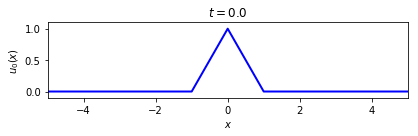

In [23]:
# Define the initial (t=0) wave form and the wave speed.
height = 1.
width = 1.
c_wave = 1.

# Make a figure showing the initial wave.
t_now = 0.

fig = plt.figure(figsize=(6,2), num='Triangular wave')
ax = fig.add_subplot(1,1,1)
ax.set_xlim(x_min, x_max)
gap = 0.1
ax.set_ylim(-gap, height + gap)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$u_0(x)$')
ax.set_title(rf'$t = {t_now:.1f}$')

line, = ax.plot(x_pts, 
                u_triangle(x_pts, t_now, c_wave, height, width), 
                color='blue', lw=2)

fig.tight_layout()


Next make some plots at an array of time points.

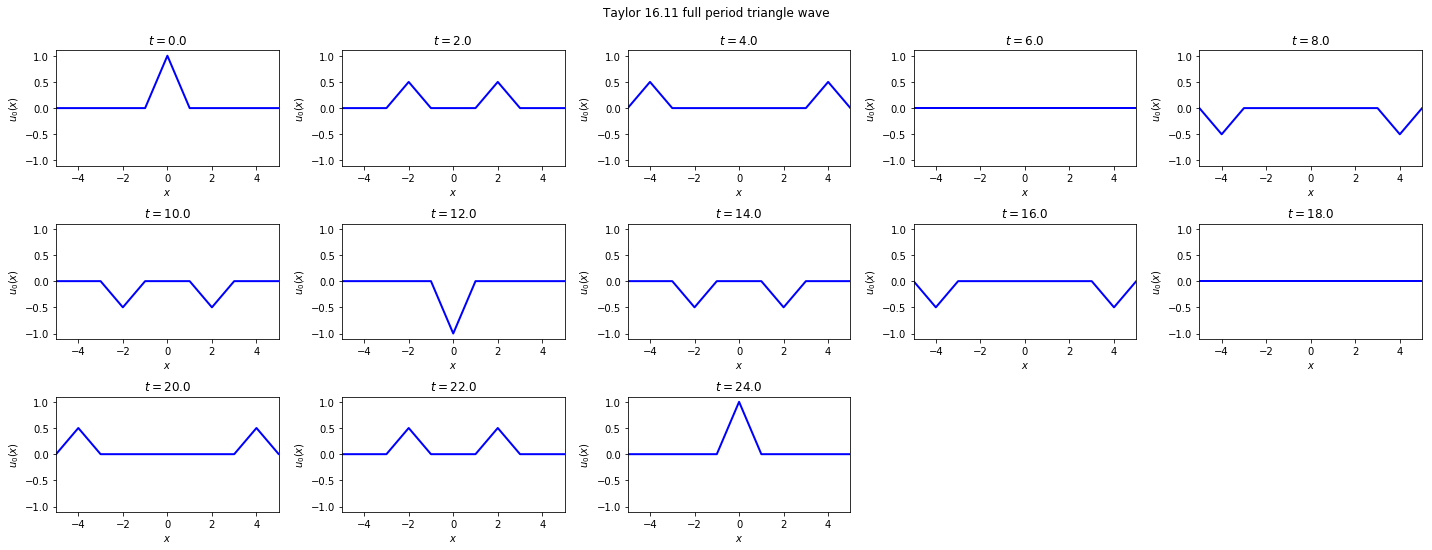

In [92]:
t_array = np.array([0.,  2.,  4.,  6, -4, -2, -0.0000001,-2,-4,6,4.,2., 0])

fig_array = plt.figure(figsize=(20,8), num='Triangular wave')

for i, t_now in enumerate(t_array): 
    ax_array = fig_array.add_subplot(3,5, i+1)
    ax_array.set_xlim(x_min, x_max)
    gap = 0.1
    ax_array.set_ylim(-height-gap, height + gap)
    ax_array.set_xlabel(r'$x$')
    ax_array.set_ylabel(r'$u_0(x)$')
    ax_array.set_title(rf'$t = {i*2.:.1f}$')

    ax_array.plot(x_pts, 
                  u_triangle(x_pts, t_now, c_wave, height, width), 
                  color='blue', lw=2)
fig_array.suptitle("Taylor 16.11 full period triangle wave")
fig_array.tight_layout(rect=[0, 0.03, 1, 0.95])
fig_array.savefig('Taylor_16.11.png', 
                   bbox_inches='tight')  

Now it is time to animate!

In [76]:
# Set up the t mesh for the animation.  The maximum value of t shown in
#  the movie will be t_min + delta_t * frame_number
t_min = 0.   # You can make this negative to see what happens before t=0!
t_max = 24.
delta_t = 0.05
t_pts = np.arange(t_min, t_max, delta_t)

We use the cell "magic" `%%capture` to keep the figure from being shown here.  If we didn't the animated version below would be blank.

In [77]:
%%capture

fig_anim = plt.figure(figsize=(6,2), num='Triangular wave')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
gap = 0.1
ax_anim.set_ylim(-gap-height, height + gap)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
line_anim, = ax_anim.plot(x_pts, 
                          u_triangle(x_pts, t_min, c_wave, height, width), 
                          color='blue', lw=2)

fig_anim.tight_layout()

In [78]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    t = t_pts[i]
    y_pts = u_triangle(x_pts, t, c_wave, height, width)
    if t > 6. and t <= 12.:
        t_new = 12-t
        y_pts = -u_triangle(x_pts, t_new, c_wave, height, width)
    if t > 12. and t <= 18.:
        t_new = t-12
        y_pts = -u_triangle(x_pts, t_new, c_wave, height, width)
    if t > 18.:
        t_new = 24-t
        y_pts = u_triangle(x_pts, t_new, c_wave, height, width)
        
    line_anim.set_data(x_pts, y_pts)  # overwrite line_anim with new points
    return (line_anim,)   # this is needed for blit=True to work

In [79]:
frame_interval = 20  # time between frames
frame_number = int((t_max-t_min)/delta_t)  # number of frames to include (index of t_pts)
anime = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

#fig.show()

In [80]:
HTML(anime.to_jshtml())